In [1]:
def plot_grid_search_2d(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
# Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_1),len(grid_param_2))
    # Plot Grid search scores
    _, ax = plt.subplots(1,1)
    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_1):
        ax.plot(grid_param_2, scores_mean[idx,:], '-o', label= name_param_1 + ': ' + str(val))
        ax.set_title("Grid Search Scores", fontsize=12, fontweight='bold')
        ax.set_xlabel(name_param_2, fontsize=10)
        ax.set_ylabel('CV Average Validation Accuracy', fontsize=10)
        ax.legend(loc="best", fontsize=8)
        ax.grid('on')

In [2]:
### Function to visualize the results of Grid Search with 3 hyperparameters ###
def plot_grid_search_3d(cv_results, grid_param_1, grid_param_2, grid_param_3, name_param_1, name_param_2, name_param_3):
    """
    Plots a grid search result for 3 hyperparameters as a series of 2D plots (one for each value of grid_param_3).
    """
    import numpy as np
    import matplotlib.pyplot as plt

    scores_mean = np.array(cv_results['mean_test_score'])
    # Reshape to (len(grid_param_1), len(grid_param_2), len(grid_param_3))
    scores_mean = scores_mean.reshape(len(grid_param_1), len(grid_param_2), len(grid_param_3))

    for idx3, val3 in enumerate(grid_param_3):
        _, ax = plt.subplots(1, 1, figsize=(7, 5))
        for idx1, val1 in enumerate(grid_param_1):
            ax.plot(grid_param_2, scores_mean[idx1, :, idx3], '-o', label=f"{name_param_1}: {val1}")
        ax.set_title(f"Grid Search Scores ({name_param_3}: {val3})", fontsize=12, fontweight='bold')
        ax.set_xlabel(name_param_2, fontsize=10)
        ax.set_ylabel('CV Average Validation Accuracy', fontsize=10)
        ax.legend(loc="best", fontsize=8)
        ax.grid(True)
        plt.show()

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

balanced_data = pd.read_csv("balanced_data.csv")
# Features und Ziel
X = balanced_data.drop(columns='target')
Y = balanced_data['target']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=22)

# Klassifikationsmodell
RForClassCV = RandomForestClassifier(random_state=0)
#gini und anderes ausporbieren
# Grid definieren
param_grid = {
    'max_depth': [50],
    'n_estimators': [300],
    'criterion': ['gini'],
    'min_samples_leaf': [1]
}

# GridSearchCV Setup
model = RandomForestClassifier(random_state=0)
grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid.fit(X_train, Y_train)

# Plot aufrufen
import matplotlib.pyplot as plt
plot_grid_search_2d(grid.cv_results_, param_grid['max_depth'], param_grid['n_estimators'],'max_depth', 'n_estimators')

plt.show()

NameError: name 'plot_grid_search_2d' is not defined

Train Accuracy: 0.9997
Test Accuracy: 0.8673


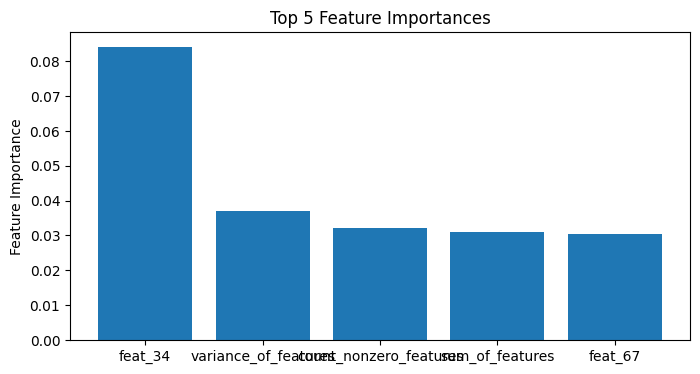

In [4]:
# Klassifikationsmodell mit besten Parametern aus CV
final_rf_clf = RandomForestClassifier(random_state=0)
final_rf_clf.set_params(**grid.best_params_)

# Modell trainieren
final_rf_clf.fit(X_train, Y_train)

# Accuracy auf Trainings- und Testdaten berechnen
train_acc = final_rf_clf.score(X_train, Y_train)
test_acc = final_rf_clf.score(X_test, Y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# View a list of the features and their importance scores
import matplotlib.pyplot as plt

feature_importances = list(zip(X_train.columns, final_rf_clf.feature_importances_))
# Sort by importance descending and take top 5
top_features = sorted(feature_importances, key=lambda x: x[1], reverse=True)[:5]

# Unzip for plotting
features, importances = zip(*top_features)

plt.figure(figsize=(8, 4))
plt.bar(features, importances)
plt.ylabel("Feature Importance")
plt.title("Top 5 Feature Importances")
plt.show()

